In [1]:
from dgl.data import SSTDataset


In [3]:
# get dataset
train_data = SSTDataset()
dev_data = SSTDataset(mode='dev')
test_data = SSTDataset(mode='test')
tiny_data = SSTDataset(mode='tiny')
words = list(train_data.vocab.keys())

In [30]:
for tree in train_data:
    input_ids = tree.ndata['x'] # word id of the node
    labels = tree.ndata['y'] #  label of the node
    mask = tree.ndata['mask'] # 1 if the node is a leaf, otherwise 0
    adj= tree.adj()
    print([ words[idw] for idw in input_ids[mask == 1]])
    
#     print(adj)
    break

['the', 'rock', 'is', 'destined', 'to', 'be', 'the', '21st', 'century', "'s", 'new', '``', 'conan', "''", 'and', 'that', 'he', "'s", 'going', 'to', 'make', 'a', 'splash', 'even', 'greater', 'than', 'arnold', 'schwarzenegger', ',', 'jean-claud', 'van', 'damme', 'or', 'steven', 'segal', '.']


In [44]:
input_ids

tensor([-1, -1,  0,  1, -1, -1,  2, -1,  3, -1, -1, -1, -1,  4, -1,  5, -1,  0,
        -1,  6, -1, -1,  7,  8, -1,  9, -1, 10, 11, 12, 13, -1, 14, -1, 15, -1,
         8, -1, 16, -1,  4, -1, -1, 17, -1, -1, 18, 19, -1, 20, 21, -1, 22, -1,
        -1, -1, -1, -1, 23, 24, 25, -1, 26, -1, 27, 28, 29, -1, 30, 31, 32])

/var/folders/wh/dzlv3bps3ms61gjh0rl9y1r00000gp/T/ipykernel_2951/2318544803.py:15: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


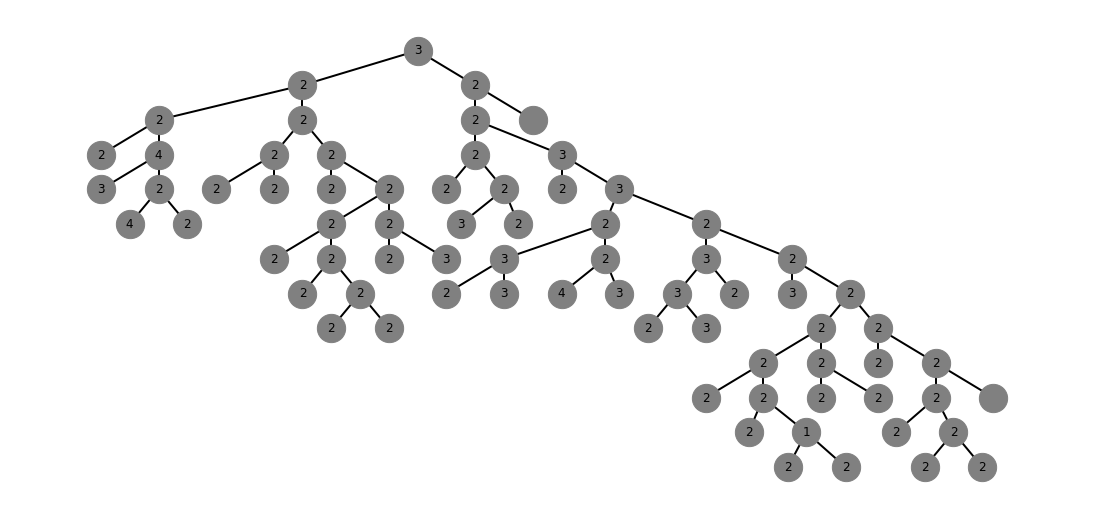

In [51]:
import dgl
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

# dataset = dgl.data.CoraGraphDataset()
g = train_data[1]
options = {
    'node_color': 'gray',
    'node_size': 800,
    'width': 2,
}
G = dgl.to_networkx(g)
G = G.to_undirected()
pos = graphviz_layout(G, prog="dot")
plt.figure(figsize=[15,7])

nx.draw(G, pos, 
        labels={i:int(label) for i,label in enumerate(labels)}, 
        with_labels=True,
        **options)
